# https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set/

In [1]:
import pandas as pd # data preprocessing,csv file I/O(e.g.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization_evaluation
import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
df = pd.read_csv("car_evaluation.csv",header=None)                 

# Exploratory data analysis

In [3]:
# view dimensions of datasets
df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variable in the datasets


# View  top five rown of datasets

In [4]:
# preview the data
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Rename columns names

We can see the dataset does not have proper name.The column are merely labelled as 0,1,2,3...and so on.Let's give proper name

In [5]:
col_name = ["buying","maint","doors","persons","lug_boot","safety","class"]
df.columns = col_name
col_name

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# Let's preview the datasets
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Column names renamed is done

# View the summary of the datasets

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Frequency distribution of values in variables


Now,I will check the frequency counts of categorical variables

In [8]:
for cols in col_name:
    print(df[cols].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Summary of variables

* There are 7 variables in the datasets.All the variables are the categorical data type.

* And the class is the our target variable

# Explore the class varibales

In [9]:
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature

# Missing values in variables

In [10]:
# Checking the missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see their is no missing values in the datasets.I have checked the frequency distribution of values previously. 
It also confirms that there are no missing values in the datasets.

# Declare feature vector and target variable

In [11]:
X = df.drop(['class'],axis=True)
y = df['class']

# Split data into separate training and test set

In [12]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [13]:
X_train

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high
...,...,...,...,...,...,...
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med


In [14]:
y_train

48      unacc
468     unacc
155     unacc
1721     good
1208    unacc
        ...  
1130    vgood
1294     good
860       acc
1459    unacc
1126      acc
Name: class, Length: 1157, dtype: object

In [15]:
#Importing category encoder
import category_encoders as ce

In [16]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols= ["buying","maint","doors","persons","lug_boot","safety"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [18]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building.

# Random Forest Classifier model 10 Dts

In [19]:
#import Random forest classifier
from sklearn.ensemble import RandomForestClassifier

#instantiate the classifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)

# fit the model
rfc.fit(X_train,y_train)

# Predict the test set results
y_pred = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print("Model accuracy score with 10 decision-tree: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision-tree: 0.9247


Here,y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Here,I have build the Random Forest Classifier model with the default parameter of n_estimators = 10. So, I have used 10 decision- tree to build the model.Now I will increase the numbers of decision-tree and see its effect on accuracy.


# Random Forest Classifier model with DTs

In [20]:
#instantiate the classifier

rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model
rfc_100.fit(X_train,y_train)

# Predict the test set results
y_pred_100 = rfc.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print("Model accuracy score with 100 decision-tree: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

Model accuracy score with 100 decision-tree: 0.9247


The model accuracy score with 10 decision-tree is 0.9247 but the same with 100 decision-trees is 0.9457. So,as expected accuracy increase with number of decision-tree in the model

# Find important features with Random Forest model

Unit now,I have used all the features given in the model.Now, I will select only the important features,build the model using these features and see its effect on accuracy.

First,I will create the Random Forest model as follow:-

In [21]:
# Create the classifier with n_estimators =100

clf = RandomForestClassifier(n_estimators=100,random_state=0)

# fit the model to the training set
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

Now,I will use the feature important variable to see feature important scores.

In [22]:
feature_score = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

feature_score

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

We can see the that the most important feature is safety and least important feature is doors.

# Visualize the feature scores of the features

Now, I will visulaize the feature scores with matplotlib and seaborn

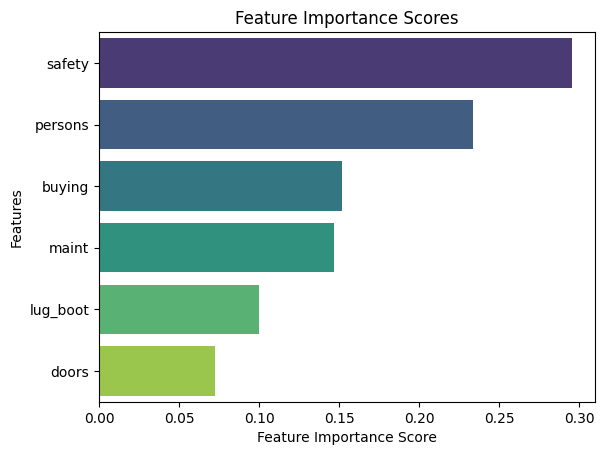

In [23]:
# Creating a seaborn bar plot

sns.barplot(x=feature_score, y=feature_score.index, palette="viridis")

# Add Labels to the group
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the group
plt.title("Feature Importance Scores")

# Visualize the graph
plt.show()

# Build Random Forest model on selected features

In [24]:
# Declare features vector and target variable

X = df.drop(['class','doors'],axis=True)

y = df['class']

In [25]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols= ["buying","maint","persons","lug_boot","safety"])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [27]:
#instantiate the classifier

clf = RandomForestClassifier(random_state=0)

# fit the model
clf.fit(X_train,y_train)

# Predict the test set results
y_pred_clf = clf.predict(X_test)

# Check accuracy score
from sklearn.metrics import accuracy_score

print("Model accuracy score with 100 decision-tree: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

Model accuracy score with 100 decision-tree: 0.9247


In [28]:
from sklearn.metrics import confusion_matrix

cm_clf = confusion_matrix(y_test, y_pred_clf)

print("Confusion matrix:\n", cm_clf)


Confusion matrix:
 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


In [29]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix

cm_clf = confusion_matrix(y_test, y_pred_100)
print("Confusion matrix:\n", cm_clf)

Confusion matrix:
 [[109  12   7   1]
 [  3  15   1   1]
 [ 13   0 384   0]
 [  3   2   0  20]]


# Classification Report

Classification report is another way to evaluate the classification model performance.It displays
the precision,recall,f1 and support scores for the model.I have described these terms in later.

We can print a classification report as follows:-

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_100))

              precision    recall  f1-score   support

         acc       0.85      0.84      0.85       129
        good       0.52      0.75      0.61        20
       unacc       0.98      0.97      0.97       397
       vgood       0.91      0.80      0.85        25

    accuracy                           0.92       571
   macro avg       0.81      0.84      0.82       571
weighted avg       0.93      0.92      0.93       571

